In [1]:
#importing libraries 
import pandas as pd 
from datasets import load_dataset 
import matplotlib.pyplot as plt 
import ast

#loading data 
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#cleaning data 
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
df_DA_india = df[(df['job_title_short'] == 'Data Analyst') &  (df['job_country'] == "India")]
df_DA_india = df_DA_india.dropna(subset = ['salary_year_avg'])

In [6]:
df_DA_india = df_DA_india.explode('job_skills')

In [21]:
df_DA_india_group = df_DA_india.groupby('job_skills')['salary_year_avg'].agg(['median', 'count'])
df_DA_top_pay = df_DA_india_group.sort_values(by = 'median' , ascending= False).head(10)
df_DA_skills = df_DA_india_group.sort_values(by='count' , ascending = False).head(10).sort_values(by='median' , ascending = False)


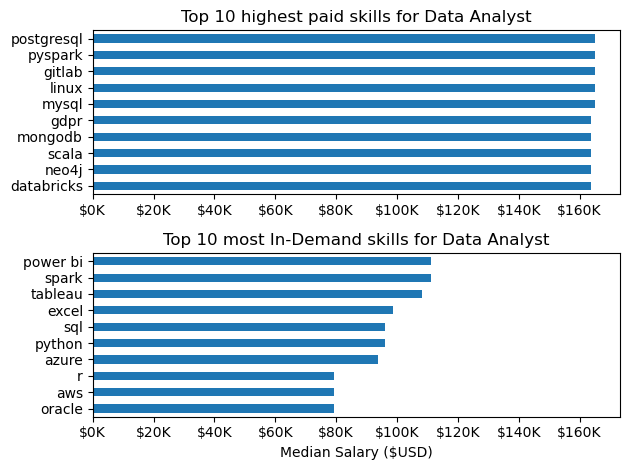

In [ ]:
fig , ax = plt.subplots(2,1)
df_DA_top_pay.plot(kind = 'barh',  y = 'median' , ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Top 10 highest paid skills for Data Analyst')
ax[0].set_xlabel("")
ax[0].set_ylabel("")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter( lambda x , pos : F'${int(x/1000)}K'))
ax[0].legend().set_visible(False)


df_DA_skills.plot(kind = 'barh', y = 'median', ax=ax[1] , legend = False)
ax[1].invert_yaxis()
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top 10 most In-Demand skills for Data Analyst')
ax[1].set_ylabel("")
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter( lambda x, pos : F'${int(x/1000)}K'))

fig.tight_layout()